## Libraries

In [137]:
import pandas as pd
from IPython.display import Image
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as normal
from scipy.stats import skew,kurtosis

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import linear_model

In [138]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [139]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [141]:
train_data.shape

(1460, 81)

In [142]:
houses_data = train_data.append(test_data,ignore_index=True)#.reset_index(drop=True)
np.unique(houses_data.index)

C:\Users\dusic\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


array([   0,    1,    2, ..., 2916, 2917, 2918], dtype=int64)

In [143]:
houses_data.shape

(2919, 81)

In [144]:
houses_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

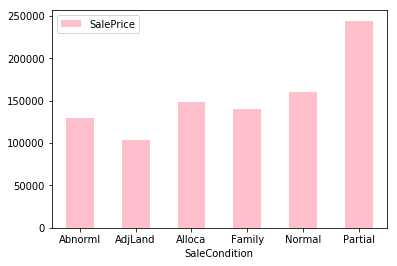

In [145]:
SaleCondition_pivot=houses_data.pivot_table(index='SaleCondition',
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

In [146]:
houses_data['SaleCondition_d']=np.where(houses_data['SaleCondition']!='Partial',0,1)
#test_data['SaleCondition_d']=np.where(test_data['SaleCondition']!='Partial',0,1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

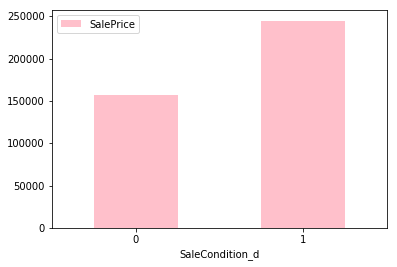

In [147]:
SaleCondition_pivot=houses_data.pivot_table(index='SaleCondition_d',
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

There are different ways to handle the missing values(**nan** values). The first one is to **drop the columns** with missing values. The second one is to **drop the rows** with the missing values, and third is to **impute** those missing values.

## Target Variable

The analysis of the variable we need to predict!!!

In [148]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [149]:
print('kurtosis',kurtosis(train_data.SalePrice),'skewness',
skew(train_data.SalePrice)) 

kurtosis 6.509812011089439 skewness 1.880940746034036


C:\Users\dusic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


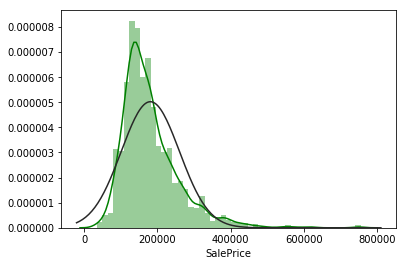

In [150]:
sns.distplot(train_data.SalePrice,color="green",fit=normal)

transforming the dependent variable. 


Multiple regression works most reliably when the inputs come in a form that is the well-known distribution of the data . 

In order to make the variable better fit the assumptions underlying regression, we need to transform it. There are a number of ways to do this, but the most common for our purposes is to take the log of ‘Giving’. (This is easily done in Data Desk using a derived variable and the ‘log’ statement; just remember to take the log of ‘Giving’ plus a nominal value of 1, because you can’t take a log of zero.) When we call up a histogram of ‘Log of Lifetime Giving’, we can see that the distribution is significantly closer to the normal probability distribution. It’s a bit skewed to one side, but it’s a big improvement.


The distribution of the target variable is positively skewed.
We will perform the log-transform of the target variable in order to 
improve the linearity of the data.

BUT ALSO, predictions of the final model would also be log-transformed 
so before submission values of the predictions will be converted 
back to their original form

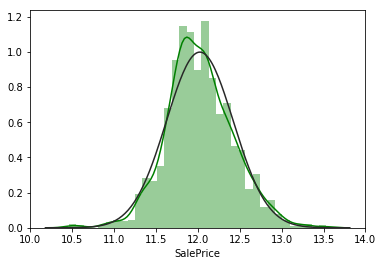

In [151]:
sns.distplot(np.log1p(train_data.SalePrice),color="green",fit=normal)

In [152]:
houses_data.SalePrice=houses_data.SalePrice.fillna(0)

In [153]:
houses_data.SalePrice=np.log1p(houses_data.SalePrice)

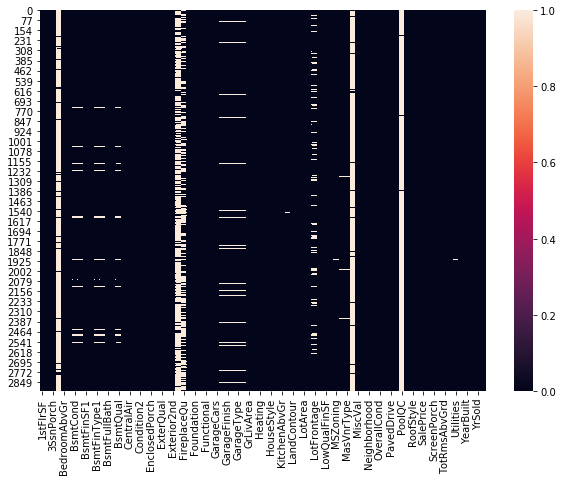

In [154]:
plt.figure(figsize=(10,7))
sns.heatmap(houses_data.isnull())

### Imputing missing values


In [155]:
houses_data.PoolQC.describe()

count     10
unique     3
top       Gd
freq       4
Name: PoolQC, dtype: object

In [156]:
houses_data.PoolQC.value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

PoolQC: Pool quality can have different values:

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
    
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

In [157]:
houses_data.PoolQC=houses_data.PoolQC.fillna("None")

In [158]:
houses_data.MiscFeature.describe()

count      105
unique       4
top       Shed
freq        95
Name: MiscFeature, dtype: object

In [159]:
houses_data.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

In [160]:
houses_data.MiscFeature=houses_data.MiscFeature.fillna("None")

In [161]:
houses_data.Alley.describe()

count      198
unique       2
top       Grvl
freq       120
Name: Alley, dtype: object

In [162]:
houses_data.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       

In [163]:
houses_data.Fence=houses_data.Fence.fillna("None")

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [164]:
houses_data.FireplaceQu=houses_data.FireplaceQu.fillna("None")

In [165]:
is_null_cols=houses_data.isnull()
a=(is_null_cols.sum()/len(is_null_cols)*100).sort_values(axis=0, ascending=False) 
a[a.apply(lambda x: x>0)]

Alley           93.216855
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Exterior1st      0.034258
GarageCars       0.034258
GarageArea       0.034258
Exterior2nd      0.034258
KitchenQual      0.034258
Electrical       0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
SaleType         0.034258
BsmtFinSF1       0.034258
dtype: float64

In [166]:
x=houses_data.isnull().sum()
x[x>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

GarageYrBlt       

The influence of the information is important. If NA is replaced with the 0 it means that there is NO garage therefore year of building it can't exist! And also for GarageArea and GarageCars...if we assume that NA means that there is no garage, then area of garage is 0 and number of garage cars is also 0.

In [167]:
def fill_with_zero(column_lst):
    for column in column_lst:
        houses_data[column]=houses_data[column].fillna(0)

In [168]:
def fill_with_none(column_lst):
    for column in column_lst:
        houses_data[column]=houses_data[column].fillna("None")

In [169]:
zero_cols=["GarageCars","GarageArea","GarageYrBlt",'GarageQual']
fill_with_zero(zero_cols)

In [170]:
none_cols=["Alley","BsmtQual","BsmtCond","BsmtExposure",'BsmtFinType1''',"BsmtFinType2",
"FireplaceQu","GarageType","GarageFinish","GarageCond","PoolQC","Fence"]
fill_with_none(none_cols)

UKRALA PA IZMENI!!

In [171]:
houses_data["LotFrontage"] = houses_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [172]:
zero_cols=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
fill_with_zero(zero_cols)

In [173]:
houses_data.Electrical.describe()

count      2918
unique        5
top       SBrkr
freq       2671
Name: Electrical, dtype: object

In [174]:
(houses_data.Electrical=='SBrkr').sum()

2671

In [175]:
houses_data['Electrical'].value_counts().index[0]

'SBrkr'

In [176]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
houses_data['Electrical'] = houses_data['Electrical'].fillna(houses_data['Electrical'].value_counts().index[0])

In [177]:
houses_data['Exterior1st'] = houses_data['Exterior1st'].fillna(houses_data['Exterior1st'].value_counts().index[0])

In [178]:
houses_data['Exterior2nd'] = houses_data['Exterior2nd'].fillna(houses_data['Exterior2nd'].value_counts().index[0])

In [179]:
houses_data['KitchenQual'] = houses_data['KitchenQual'].fillna(houses_data['KitchenQual'].value_counts().index[0])

In [180]:
houses_data['SaleType'] = houses_data['SaleType'].fillna(houses_data['SaleType'].value_counts().index[0])

In [181]:
#Functional : data description says NA means typical
houses_data["Functional"] = houses_data["Functional"].fillna("Typ")

In [182]:
houses_data.Functional.describe()

count     2919
unique       7
top        Typ
freq      2719
Name: Functional, dtype: object

In [183]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
houses_data = houses_data.drop(['Utilities'], axis=1)

In [184]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
houses_data['MSZoning'] = houses_data['MSZoning'].fillna(houses_data['MSZoning'].value_counts().index[0])

In [185]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
houses_data["MasVnrType"] = houses_data["MasVnrType"].fillna("None")
houses_data["MasVnrArea"] = houses_data["MasVnrArea"].fillna(0)

In [186]:
houses_data.GarageArea=houses_data.GarageArea.fillna(0)

In [187]:
#houses_data=houses_data.select_dtypes(include=np.number).interpolate().dropna()


#TRY to encode into numers the ranked categories
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(['a','b','b','c','d'])
le.transform(['d','b','c','a'])

def LabelEncoderFitter(columns,fit_lst): 
    for col in columns:
        le=LabelEncoder()
        vals=list(houses_data[col].values)
        le.fit(fit_lst)
        houses_data[col]=le.transform(vals)

cols=['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','PoolQC'],
for col in cols:
    print(houses_data[col].isnull().sum())

cols=['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','PoolQC']

for col in cols:
    houses_data[col].replace(['0', 0], ['None','None'], inplace=True)

LabelEncoderFitter(['LotShape'],['IR3','IR2','IR1','Reg'])

LabelEncoderFitter(['LandSlope'],['Gtl','Mod','Sev'])

LabelEncoderFitter(['ExterQual','ExterCond','HeatingQC','KitchenQual'],['Po','Fa','TA','Gd','Ex'])

LabelEncoderFitter(['BsmtQual','BsmtCond','FireplaceQu','GarageQual','GarageCond','PoolQC'],['None','Po','Fa','TA','Gd','Ex'])

LabelEncoderFitter(['BsmtExposure'],['None','No','Mn','Av','Gd'])

LabelEncoderFitter(['BsmtFinType1','BsmtFinType2'],['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'])

LabelEncoderFitter(['GarageFinish'],['None','Unf','RFn','Fin'])

LabelEncoderFitter(['Fence'],['None','MnWw','GdWo','MnPrv','GdPrv'])

le.fit(['a','b','b','c','d'])
le.transform(['d','b','c','a'])

In [188]:
dummies=pd.get_dummies(houses_data.select_dtypes(include=['object']), drop_first=True)

In [189]:
houses_data.drop(houses_data.select_dtypes(['object']).columns,axis=1,inplace=True)

In [190]:
houses_data.shape

(2919, 39)

In [191]:
houses_data = pd.concat([houses_data, dummies], axis=1)
#houses_data.append(dummies,ignore_index=True)

In [192]:
dummies.shape

(2919, 222)

In [193]:
houses_data.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFullBath             0
BsmtHalfBath             0
BsmtUnfSF                0
EnclosedPorch            0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
Id                       0
KitchenAbvGr             0
LotArea                  0
LotFrontage              0
LowQualFinSF             0
MSSubClass               0
MasVnrArea               0
MiscVal                  0
MoSold                   0
OpenPorchSF              0
OverallCond              0
OverallQual              0
PoolArea                 0
                        ..
PavedDrive_Y             0
PoolQC_Fa                0
PoolQC_Gd                0
PoolQC_None              0
RoofMatl_CompShg         0
RoofMatl_Membran         0
R

odavde moj BS

In [194]:
x=train_data.shape[0]
x

1460

In [195]:
numero=houses_data.isnull().sum()
numero[numero>0]

Series([], dtype: int64)

### Are there any more NAN VALUES?

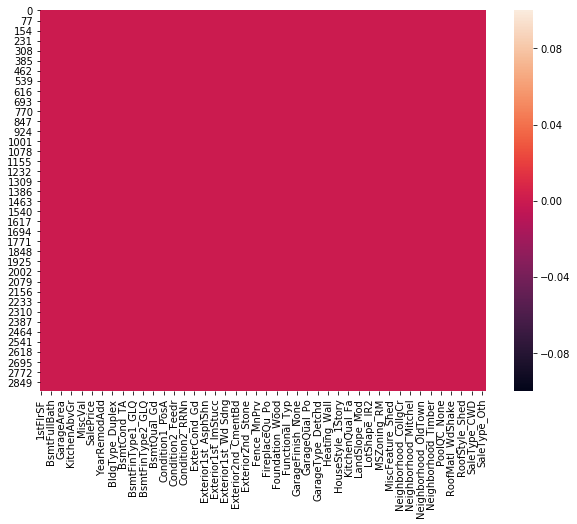

In [196]:
plt.figure(figsize=(10,7))
sns.heatmap(houses_data.isnull())

In [197]:
train_data=houses_data[:x] 

In [198]:
test_data=houses_data[x:]

In [199]:
#train_data.SalePrice=np.log1p(train_data.SalePrice)

In [200]:
#data=train_data.select_dtypes(include=np.number).interpolate().dropna()
#test_data=test_data.select_dtypes(include=np.number).interpolate().dropna()

#sum(data.isnull().sum())

In [201]:
#train_data.SalePrice=np.log1p(train_data.SalePrice)

In [202]:
train_data['TotalSuperficial'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
test_data['TotalSuperficial'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']

C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Preparing data for making a prediction

In [203]:
rmse_df=pd.DataFrame(columns=['Alg','RMSE'])

In [204]:
y=train_data.SalePrice
x=train_data.drop(['SalePrice','Id'],axis=1)

x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=13,test_size=.2)
test_data.drop('SalePrice',axis=1,inplace=True)

C:\Users\dusic\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### Linear regression

In [205]:
lr=linear_model.LinearRegression()
lr_model=lr.fit(x_train,y_train)
lr_predictions=lr_model.predict(x_test)
print(lr_model.score(x_test,y_test))

-20753416.13158424


R squared= -20753416.13158424
RMSE 3398781.233447652


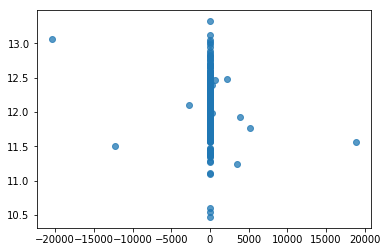

In [206]:
print('R squared=',lr_model.score(x_test,y_test))

rmse_lr=mean_squared_error(y_test,lr_predictions)
print('RMSE',rmse_lr)

rmse_df=rmse_df.append({'Alg':'Linear regression','RMSE':rmse_lr}, ignore_index=True)

lr_actual_vals=y_test
plt.scatter(lr_predictions, lr_actual_vals,alpha=.75)
plt.xlabel='Predicted Sale Price'

plt.ylabel='Actual Sale Price'

In [207]:
print(' Predicted \t'+str(np.exp(lr_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	93724.7320380705
 Actual 	79001.00000000006


In [208]:
lr_predictions=lr_model.predict(test_data.drop(['Id'],axis=1))
untransformed_preds=np.exp(lr_predictions)

In [209]:
submission=pd.DataFrame()
submission['Id']=test_data.Id



submission['SalePrice']=untransformed_preds
submission.head(5)

,Id,SalePrice
1460,1461,1.175123e+05
1461,1462,inf
1462,1463,1.811533e+05
1463,1464,2.023225e+05
1464,1465,1.915931e+05


##### Ridge Linear regression

In [210]:
rm=linear_model.Ridge(alpha=10**2)
ridge_model=rm.fit(x_train,y_train)
ridge_predictions=ridge_model.predict(x_test)
print(lr_model.score(x_test,y_test))

-20753416.13158424


R squared= 0.6340167484215757
RMSE 0.059936973238389514


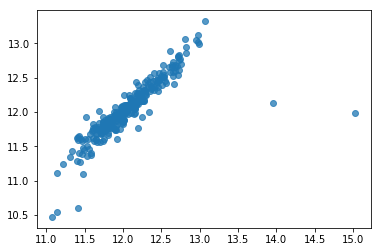

In [211]:
print('R squared=',ridge_model.score(x_test,y_test))

rmse_rlr=mean_squared_error(y_test,ridge_predictions)
print('RMSE',rmse_rlr)
rmse_df=rmse_df.append({'Alg':'Ridge Linear regression','RMSE':rmse_rlr}, ignore_index=True)

ridge_actual_vals=y_test
plt.scatter(ridge_predictions, ridge_actual_vals,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [212]:
print(' Predicted \t'+str(np.exp(ridge_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	263678.5822791889
 Actual 	262000.99999999994


In [213]:
print(' Predicted \t'+str(np.exp(ridge_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	92796.97776227699
 Actual 	79001.00000000006


In [214]:
predictions_ridge=ridge_model.predict(test_data.drop(['Id'],axis=1))

In [215]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_ridge)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.65567331 11.63344443 12.10639635 12.22540085 12.08162174] [115343.89156223 112808.21360487 181026.07252405 203903.24055515
 176596.32160885]


In [216]:
submission.head(5)

,Id,SalePrice
1460,1461,115343.891562
1461,1462,112808.213605
1462,1463,181026.072524
1463,1464,203903.240555
1464,1465,176596.321609


##### RandomForestRegressor

In [218]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=1000)
rfr_model=rfr.fit(x_train,y_train)
rfr_predictions=rfr_model.predict(x_test)

print(rfr_model.score(x_test,y_test))

0.7966750729908599


R squared= 0.7966750729908599
RMSE 0.03329846558902688


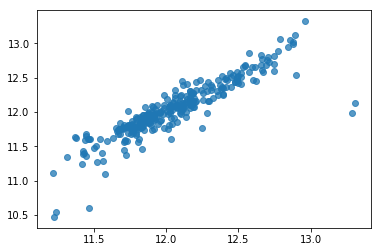

In [219]:
print('R squared=',rfr_model.score(x_test,y_test))

rmse_rfr=mean_squared_error(y_test,rfr_predictions)
print('RMSE',rmse_rfr)
rmse_df=rmse_df.append({'Alg':'RandomForestRegressor','RMSE':rmse_rfr}, ignore_index=True)


plt.scatter(rfr_predictions, y_test,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [220]:
print(' Predicted \t'+str(np.exp(rfr_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	266806.4920802971
 Actual 	262000.99999999994


In [221]:
print(' Predicted \t'+str(np.exp(rfr_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	100863.39465126945
 Actual 	79001.00000000006


In [222]:
predictions_rfr=rfr_model.predict(test_data.drop(['Id'],axis=1))

In [223]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_rfr)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.65567331 11.63344443 12.10639635 12.22540085 12.08162174] [125048.64680233 160541.91439414 172201.14908527 180295.66006469
 190694.55463786]


In [224]:
submission.head()

,Id,SalePrice
1460,1461,125048.646802
1461,1462,160541.914394
1462,1463,172201.149085
1463,1464,180295.660065
1464,1465,190694.554638


##### GradientBoostingRegressor

In [225]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,max_depth=4)
gbr_model=gbr.fit(x_train,y_train)
gbr_predictions=gbr_model.predict(x_test)
print(gbr_model.score(x_test,y_test))

0.8241310759526709


R squared= 0.8241310759526709
RMSE 0.028802003776477045


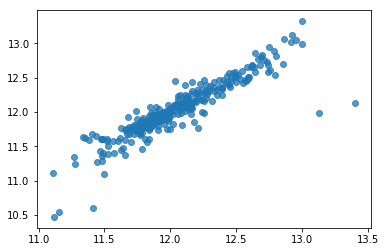

In [226]:
print('R squared=',gbr_model.score(x_test,y_test))
rmse_gbr=mean_squared_error(y_test,gbr_predictions)
print('RMSE',rmse_gbr)
rmse_df=rmse_df.append({'Alg':'GradientBoostingRegressor','RMSE':rmse_gbr}, ignore_index=True)


plt.scatter(gbr_predictions, y_test,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [227]:
print(' Predicted \t'+str(np.exp(gbr_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	293743.1117336272
 Actual 	262000.99999999994


In [228]:
p=np.exp(gbr_predictions[10])
a=np.exp(y_test.reset_index().SalePrice[10])
print(' Predicted \t'+str(p)+'\n Actual \t'+str(a))
res_gbr=p-a
print('Residual \t',str(res_gbr))

 Predicted 	93479.0226385643
 Actual 	79001.00000000006
Residual 	 14478.022638564245


In [229]:
predictions_gbr=gbr_model.predict(test_data.drop(['Id'],axis=1))

In [230]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_gbr)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.65567331 11.63344443 12.10639635 12.22540085 12.08162174] [123771.53496205 162625.39638154 184324.41763404 192449.37738391
 180500.16890614]


In [231]:
submission.head()

,Id,SalePrice
1460,1461,123771.534962
1461,1462,162625.396382
1462,1463,184324.417634
1463,1464,192449.377384
1464,1465,180500.168906


In [232]:
# From the above algs-Ridge Linear regression is the best on kaggle but on trainset GradientBoostingRegressor is the best?? !

In [237]:
submission.to_csv('submission.csv',index=False)

In [236]:
rmse_df.sort_values('RMSE',ascending=True)

,Alg,RMSE
3,GradientBoostingRegressor,2.880200e-02
2,RandomForestRegressor,3.329847e-02
1,Ridge Linear regression,5.993697e-02
0,Linear regression,3.398781e+06
